In [129]:
# Import libraries
import pandas as pd
import nltk
nltk.download('punkt');
nltk.download('stopwords')
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
import wordcloud
from wordcloud import WordCloud
import matplotlib.pyplot as plt
import pandas as pd

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [130]:
# Read the clean data csv file
data = pd.read_csv('/content/tweet.csv')

In [131]:
# Display the data
data

,OriginalTweet
0,TRENDING: New Yorkers encounter empty supermar...
1,When I couldn't find hand sanitizer at Fred Me...
2,Find out how you can protect yourself and love...
3,#Panic buying hits #NewYork City as anxious sh...
4,#toiletpaper #dunnypaper #coronavirus #coronav...
...,...
3793,Meanwhile In A Supermarket in Israel -- People...
3794,Did you panic buy a lot of non-perishable item...
3795,Asst Prof of Economics @cconces was on @NBCPhi...
3796,Gov need to do somethings instead of biar je r...


In [132]:
# Convert the text corpus into tokens
data['tokenized'] = data['OriginalTweet'].apply(lambda x: [item for item in nltk.word_tokenize(x) if item.isalpha()])

In [ ]:
# Display the data
data

In [134]:
# Perform stop word removal
data['word_wsw'] = data['tokenized'].apply(lambda x: [item for item in x if item.lower() not in stopwords.words('english')])

In [135]:
# Display the data
data

,OriginalTweet,tokenized,word_wsw
0,TRENDING: New Yorkers encounter empty supermar...,"[TRENDING, New, Yorkers, encounter, empty, sup...","[TRENDING, New, Yorkers, encounter, empty, sup..."
1,When I couldn't find hand sanitizer at Fred Me...,"[When, I, could, find, hand, sanitizer, at, Fr...","[could, find, hand, sanitizer, Fred, Meyer, tu..."
2,Find out how you can protect yourself and love...,"[Find, out, how, you, can, protect, yourself, ...","[Find, protect, loved, ones, coronavirus]"
3,#Panic buying hits #NewYork City as anxious sh...,"[Panic, buying, hits, NewYork, City, as, anxio...","[Panic, buying, hits, NewYork, City, anxious, ..."
4,#toiletpaper #dunnypaper #coronavirus #coronav...,"[toiletpaper, dunnypaper, coronavirus, coronav...","[toiletpaper, dunnypaper, coronavirus, coronav..."
...,...,...,...
3793,Meanwhile In A Supermarket in Israel -- People...,"[Meanwhile, In, A, Supermarket, in, Israel, Pe...","[Meanwhile, Supermarket, Israel, People, dance..."
3794,Did you panic buy a lot of non-perishable item...,"[Did, you, panic, buy, a, lot, of, items, ECHO...","[panic, buy, lot, items, ECHO, needs, food, do..."
3795,Asst Prof of Economics @cconces was on @NBCPhi...,"[Asst, Prof, of, Economics, cconces, was, on, ...","[Asst, Prof, Economics, cconces, NBCPhiladelph..."
3796,Gov need to do somethings instead of biar je r...,"[Gov, need, to, do, somethings, instead, of, b...","[Gov, need, somethings, instead, biar, je, rak..."


In [136]:
# Create a new column that join all the remaining words into a sentence
data['new_tweet_wsw'] = data['word_wsw'].apply(lambda x: ' '.join([word.lower() for word in x]))

In [137]:
# Display the data
data

,OriginalTweet,tokenized,word_wsw,new_tweet_wsw
0,TRENDING: New Yorkers encounter empty supermar...,"[TRENDING, New, Yorkers, encounter, empty, sup...","[TRENDING, New, Yorkers, encounter, empty, sup...",trending new yorkers encounter empty supermark...
1,When I couldn't find hand sanitizer at Fred Me...,"[When, I, could, find, hand, sanitizer, at, Fr...","[could, find, hand, sanitizer, Fred, Meyer, tu...",could find hand sanitizer fred meyer turned am...
2,Find out how you can protect yourself and love...,"[Find, out, how, you, can, protect, yourself, ...","[Find, protect, loved, ones, coronavirus]",find protect loved ones coronavirus
3,#Panic buying hits #NewYork City as anxious sh...,"[Panic, buying, hits, NewYork, City, as, anxio...","[Panic, buying, hits, NewYork, City, anxious, ...",panic buying hits newyork city anxious shopper...
4,#toiletpaper #dunnypaper #coronavirus #coronav...,"[toiletpaper, dunnypaper, coronavirus, coronav...","[toiletpaper, dunnypaper, coronavirus, coronav...",toiletpaper dunnypaper coronavirus coronavirus...
...,...,...,...,...
3793,Meanwhile In A Supermarket in Israel -- People...,"[Meanwhile, In, A, Supermarket, in, Israel, Pe...","[Meanwhile, Supermarket, Israel, People, dance...",meanwhile supermarket israel people dance sing...
3794,Did you panic buy a lot of non-perishable item...,"[Did, you, panic, buy, a, lot, of, items, ECHO...","[panic, buy, lot, items, ECHO, needs, food, do...",panic buy lot items echo needs food donations ...
3795,Asst Prof of Economics @cconces was on @NBCPhi...,"[Asst, Prof, of, Economics, cconces, was, on, ...","[Asst, Prof, Economics, cconces, NBCPhiladelph...",asst prof economics cconces nbcphiladelphia ta...
3796,Gov need to do somethings instead of biar je r...,"[Gov, need, to, do, somethings, instead, of, b...","[Gov, need, somethings, instead, biar, je, rak...",gov need somethings instead biar je rakyat ass...


In [138]:
# Count the word frequency in the table and display the 10 words having the most appearance
counts = data['new_tweet_wsw'].str.split(expand=True).stack().value_counts()
counts.head(10)

https          1824
coronavirus    1515
food           1332
store          1012
grocery         816
people          783
stock           780
amp             610
shopping        522
supermarket     515
dtype: int64

In [145]:
# Join all the sentences in the rows to a text string
text = " "
for word in data['new_tweet_wsw']:
  text += word + " "

In [143]:
# Create the WordCloud image
wordcloud = WordCloud(width = 800, height = 800, 
                      background_color ='white',
                      min_font_size = 10).generate(text)

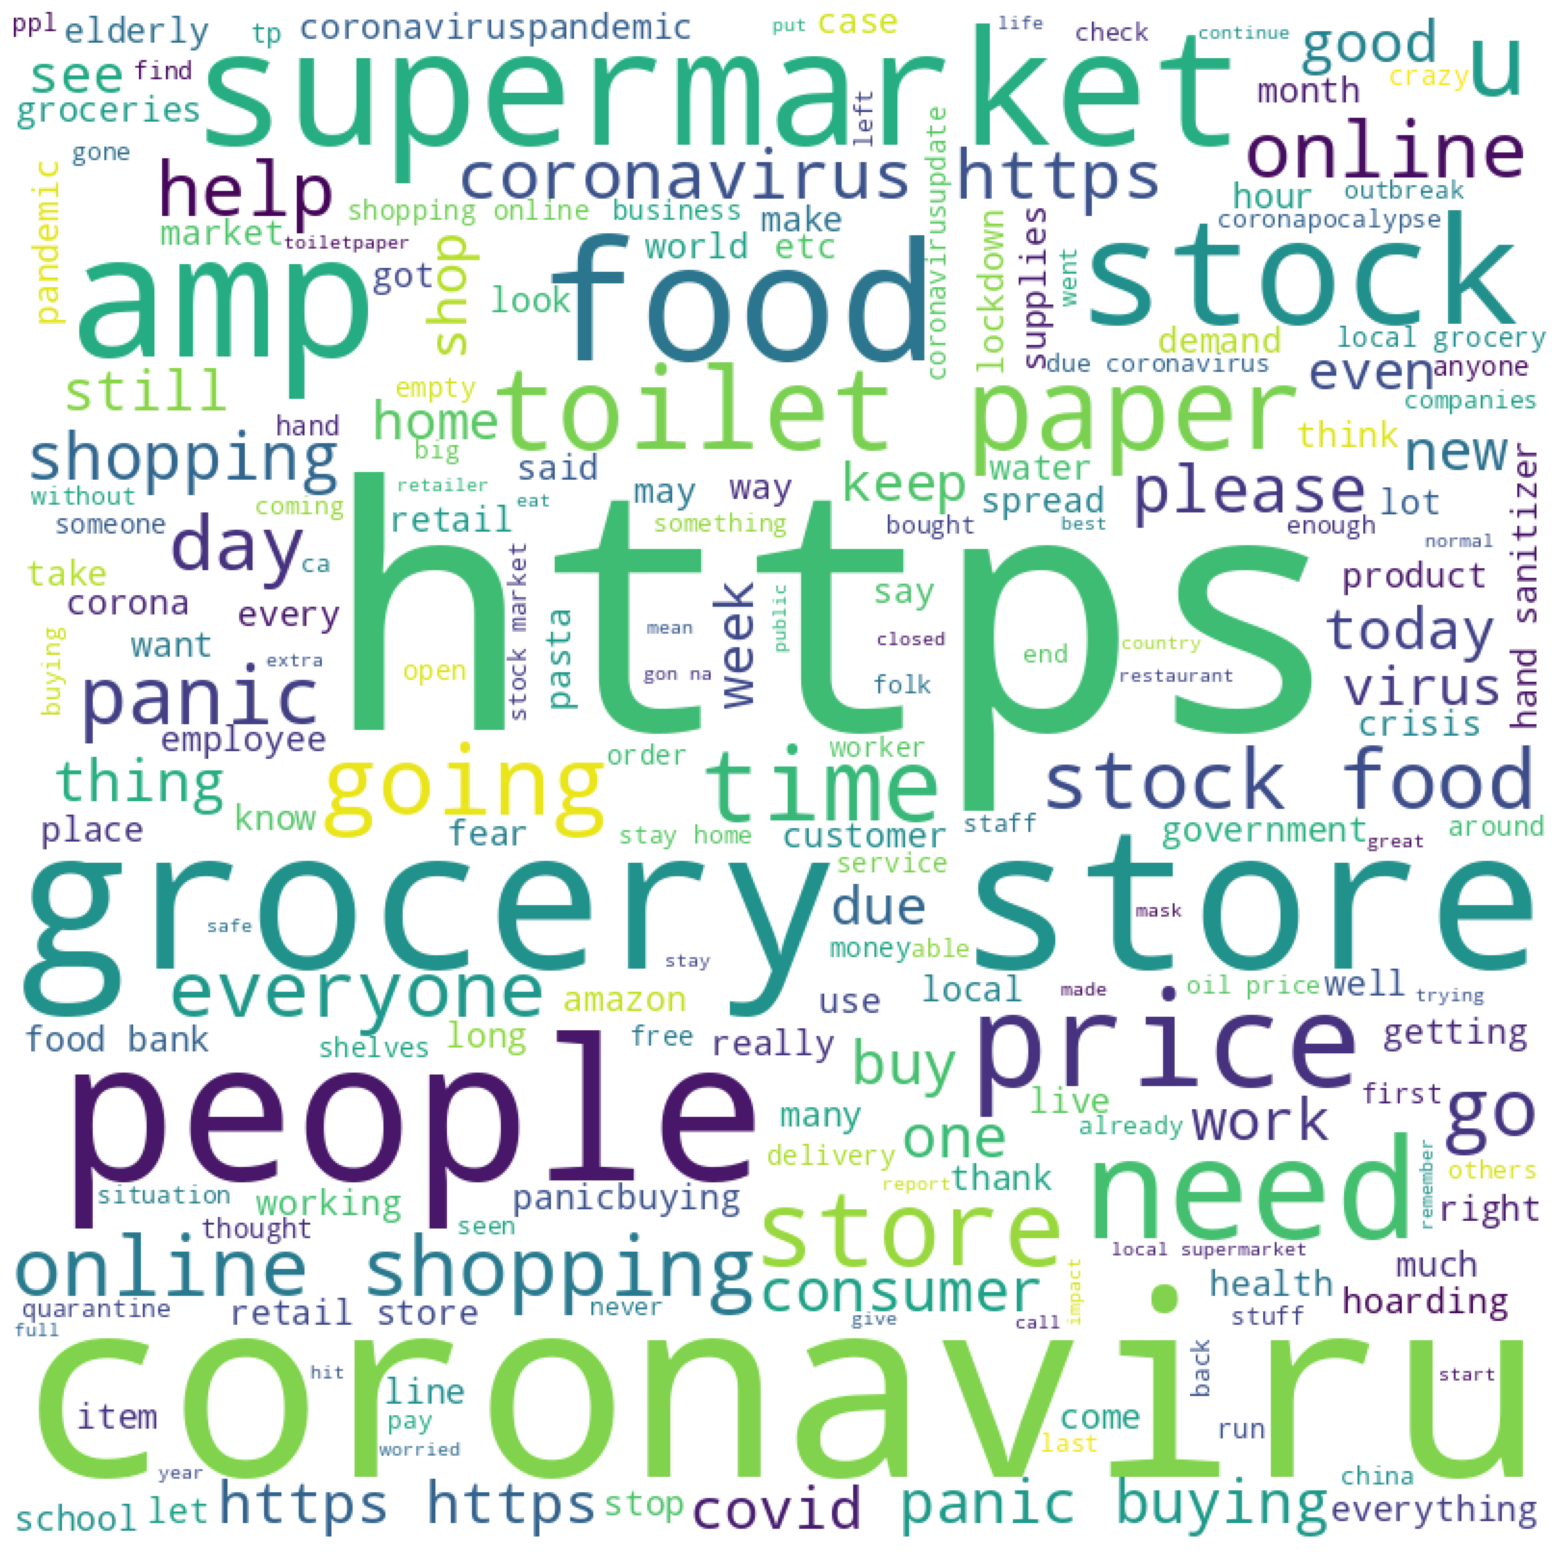

In [144]:
# Plot the WordCloud image
fig = plt.figure(figsize = (20, 20))
plt.axis('off')
plt.imshow(wordcloud)
plt.show()
